In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [33]:
df = pd.read_csv(r"C:\Users\Swapnali\Desktop\Data_ML\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text(0.5, 1.0, 'Sentiment distribution')

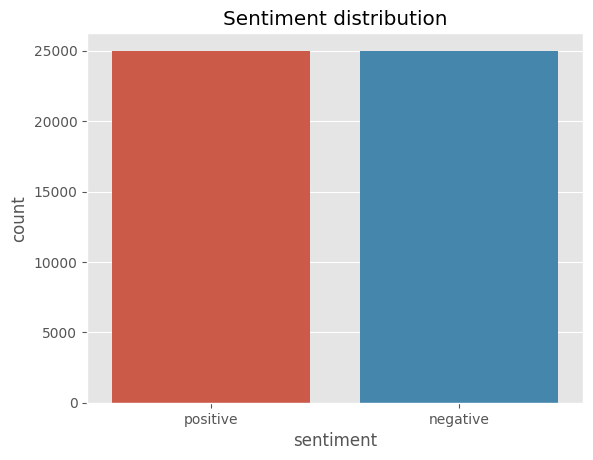

In [34]:
#count plot to view different sentiments in our data
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [35]:
#Printing first 5 reviews along with the sentiments to get a hold of the data
for i in range (5):
    print("Review: ",[i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")


Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [36]:
#adding a word count to the review
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


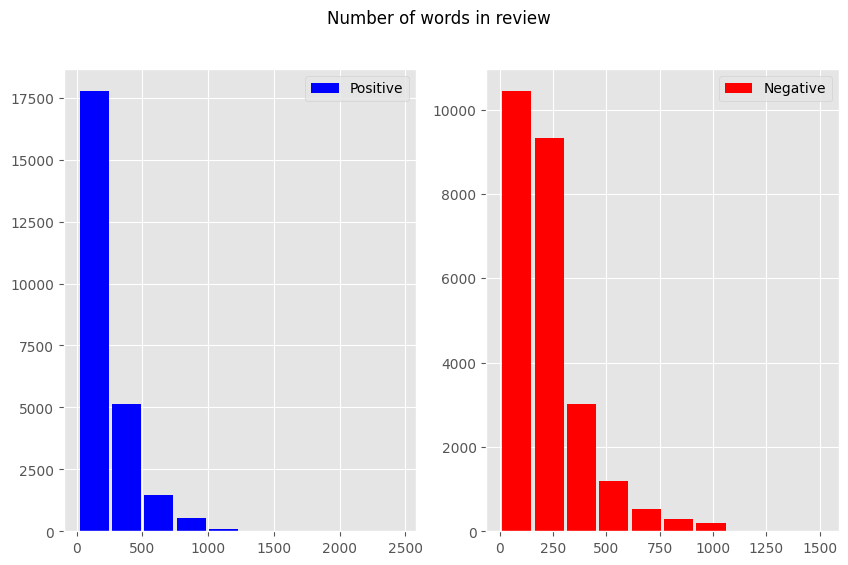

In [37]:
#seeing the distribution of positive and negative reviews
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()


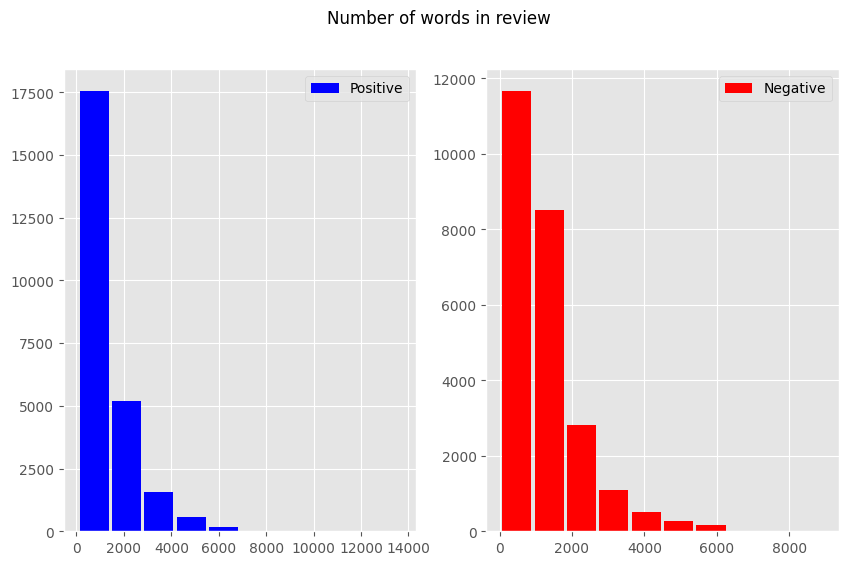

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()


In [39]:
#replacing postive with 1 and negative with 0
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)
df.head()


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [40]:
#Processing data by removing tags, punctuations and stop words
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [44]:
df.review = df['review'].apply(data_processing)


In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swapnali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
#check for duplicates
duplicated_count = df.duplicated().sum()
print(duplicated_count)

421


In [47]:
df = df.drop_duplicates('review')

In [48]:
#stemming algorithm converts words like "running", "ran" into "run"
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

df.review = df['review'].apply(lambda x: stemming(x))



C:\Users\Swapnali\AppData\Local\Temp\ipykernel_16932\3898860480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df['review'].apply(lambda x: stemming(x))


In [49]:
#to check if the number of words have reduced 
df['word count'] = df['review'].apply(no_of_words)
df.head()

C:\Users\Swapnali\AppData\Local\Temp\ipykernel_16932\4089614867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count'] = df['review'].apply(no_of_words)


,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [51]:
#TfidfVectorizer class from scikit-learn. TF-IDF is a numerical representation technique for text data. It stands for 
#Term Frequency-Inverse Document Frequency. The TfidfVectorizer is used to convert a collection of raw text documents to a matrix of TF-IDF features
X = df['review']
Y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])


In [52]:
#train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [53]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))


Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [55]:
#Training data on logistic regresiion model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 89.00%


In [56]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [59]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))


Test accuracy: 89.22%


In [60]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))


[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [62]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)


best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [63]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))


Test accuracy: 89.41%


In [64]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))


[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

